In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15541, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 15541 (delta 89), reused 193 (delta 48), pack-reused 15275
Receiving objects: 100% (15541/15541), 6.41 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (11204/11204), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.2 MB/s eta 0:00:0

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

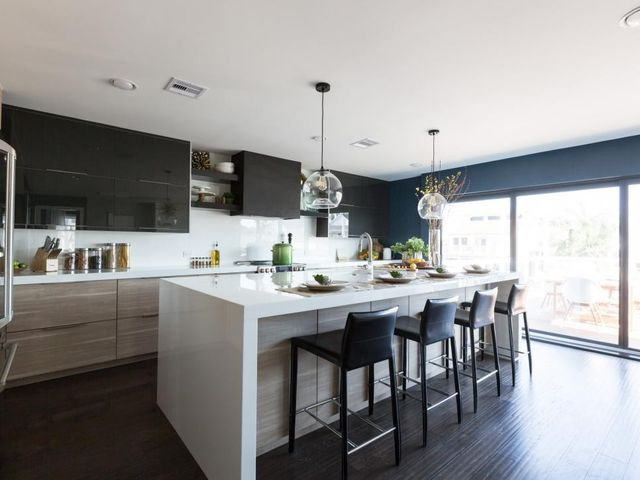

In [ ]:
im = cv2.imread("/content/drive/MyDrive/map_detect/R.jpeg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/20 15:10:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 189MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([56, 56, 56, 58, 56, 56, 43, 45, 43, 39, 60, 43, 45, 43, 56, 45, 60, 58,
        39, 45, 56], device='cuda:0')
Boxes(tensor([[561.7151, 276.8534, 604.9032, 327.4195],
        [287.6571, 304.7186, 405.7128, 471.6979],
        [394.0619, 299.0636, 462.1631, 445.9906],
        [400.6811, 235.9921, 428.7852, 268.8101],
        [452.0431, 289.3356, 503.2799, 406.8046],
        [493.8793, 282.1070, 531.1479, 379.3817],
        [ 44.0487, 236.5368,  50.9812, 250.1058],
        [216.3526, 162.4436, 234.5635, 173.2392],
        [ 45.8987, 239.1665,  53.4910, 252.0727],
        [211.6261, 241.4600, 220.1406, 266.9997],
        [158.3915, 251.1355, 493.1222, 475.2774],
        [ 52.8102, 238.1245,  58.9065, 249.5632],
        [377.0107, 268.9507, 417.5865, 282.8875],
        [ 48.1472, 237.8530,  55.9076, 251.3012],
        [540.1491, 279.7151, 565.0256, 319.7705],
        [302.5674, 276.9653, 347.0488, 291.6270],
        [171.2035, 254.5271, 511.5872, 314.9400],
        [ 12.7414, 260.148

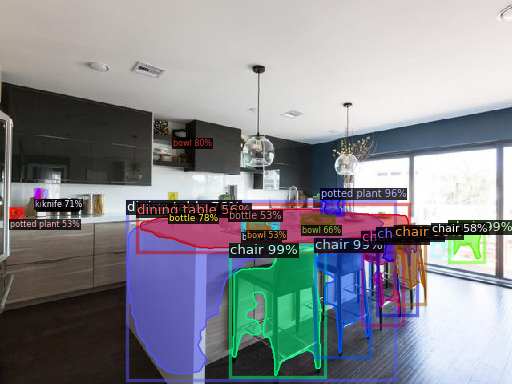

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/map_detect/train_01/train (1).json", "/content/drive/MyDrive/map_detect/train_01")
register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/map_detect/val_01/val.json", "/content/drive/MyDrive/map_detect/val_01")

In [ ]:
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")

[04/20 15:10:22 d2.data.datasets.coco]: Loaded 9 images in COCO format from /content/drive/MyDrive/map_detect/train_01/train (1).json


In [ ]:
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[04/20 15:10:23 d2.data.datasets.coco]: Loaded 2 images in COCO format from /content/drive/MyDrive/map_detect/val_01/val.json


In [ ]:
from matplotlib import pyplot as plt

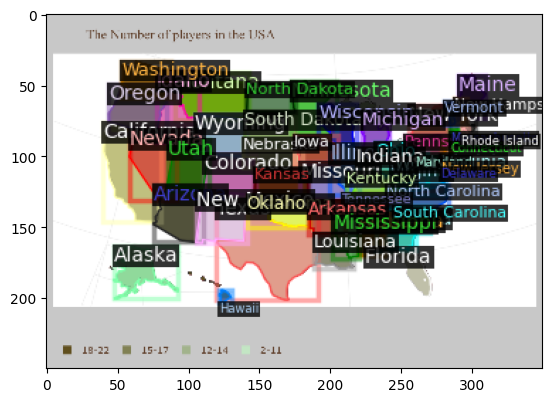

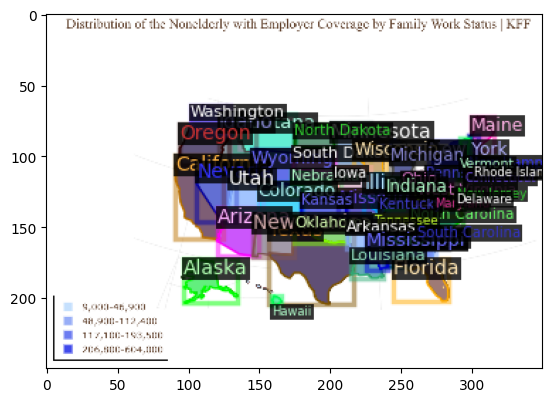

In [ ]:
for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/models/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 7500
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 50

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[04/20 15:10:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


In [ ]:
trainer.train()

[04/20 15:10:31 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[04/20 15:10:38 d2.utils.events]:  eta: 0:31:29  iter: 19  total_loss: 8.131  loss_cls: 3.977  loss_box_reg: 0.6771  loss_mask: 0.6934  loss_rpn_cls: 2.499  loss_rpn_loc: 0.2634    time: 0.2355  last_time: 0.1155  data_time: 0.0342  last_data_time: 0.0032   lr: 1.9981e-06  max_mem: 2550M
[04/20 15:10:44 d2.utils.events]:  eta: 0:17:39  iter: 39  total_loss: 7.55  loss_cls: 3.94  loss_box_reg: 0.6955  loss_mask: 0.6934  loss_rpn_cls: 1.946  loss_rpn_loc: 0.2552    time: 0.1969  last_time: 0.2546  data_time: 0.0078  last_data_time: 0.0083   lr: 3.9961e-06  max_mem: 2552M
[04/20 15:10:47 d2.utils.events]:  eta: 0:16:25  iter: 59  total_loss: 6.55  loss_cls: 3.836  loss_box_reg: 0.7452  loss_mask: 0.6933  loss_rpn_cls: 0.9997  loss_rpn_loc: 0.2529    time: 0.1776  last_time: 0.1135  data_time: 0.0128  last_data_time: 0.0034   lr: 5.9941e-06  max_mem: 2552M
[04/20 15:10:50 d2.utils.events]:  eta: 0:15:39  iter: 79  total_loss: 5.951  loss_cls: 3.723  loss_box_reg: 0.7527  loss_mask: 0.6932 

KeyboardInterrupt: 

In [ ]:
import yaml
config_yaml_path = "/content/drive/MyDrive/models/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[04/20 12:50:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/models/Detectron2_Models/model_final.pth ...


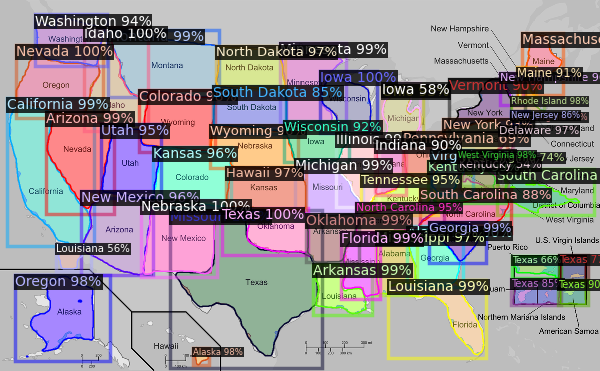

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[04/20 12:50:30 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[04/20 12:50:30 d2.data.datasets.coco]: Loaded 2 images in COCO format from /content/drive/MyDrive/map_detect/val_01/val.json
[04/20 12:50:30 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[04/20 12:50:30 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[04/20 12:50:30 d2.data.common]: Serializing 2 elements to byte tensors and concatenating them all ...
[04/20 12:50:30 d2.data.common]: Serialized dataset takes 0.08 MiB
[04/20 12:50:30 d2.evaluation.evaluator]: Start inference on 2 batches


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[04/20 12:50:31 d2.evaluation.evaluator]: Total inference time: 0:00:00.234750 (0.234750 s / iter per device, on 1 devices)
[04/20 12:50:31 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.067933 s / iter per device, on 1 devices)
[04/20 12:50:31 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[04/20 12:50:31 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[04/20 12:50:31 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.185
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.195
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.195
 Average

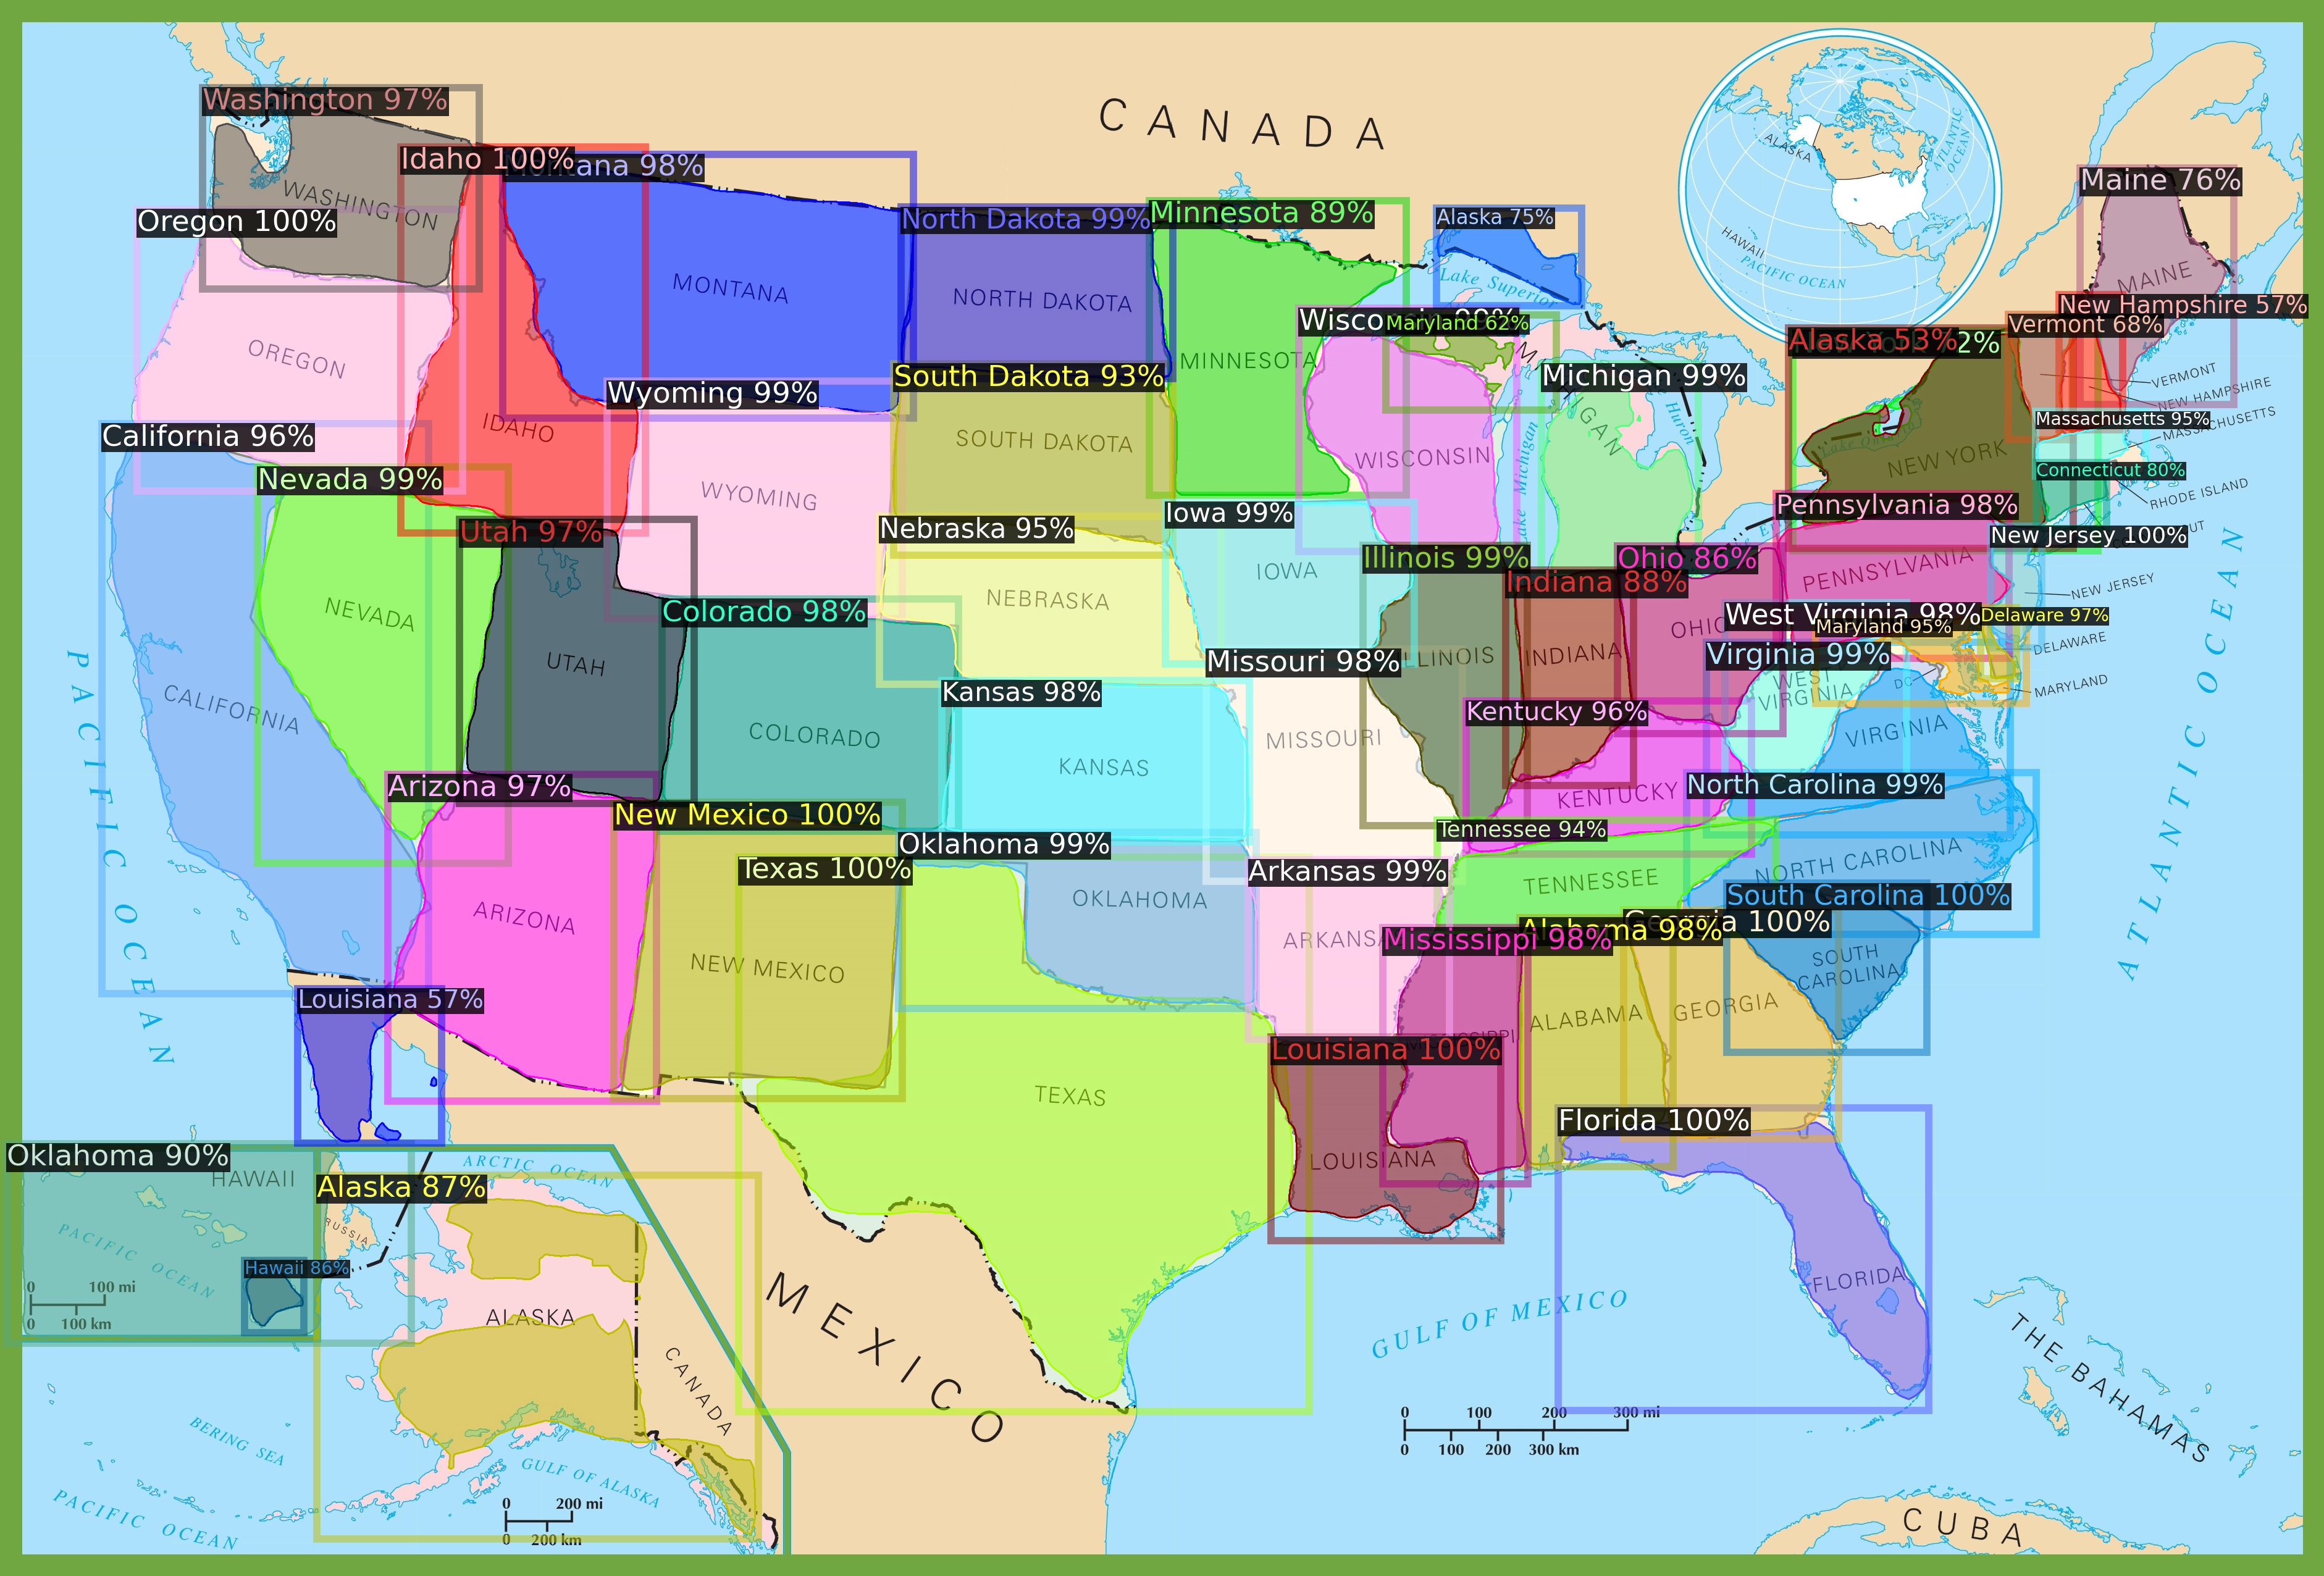

In [ ]:
new_im = cv2.imread("/content/drive/MyDrive/map_detect/test_external/R.jpeg")
outputs = predictor(new_im)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# import os
# import cv2
# import csv
# from skimage.measure import regionprops, label
# from detectron2.engine import DefaultPredictor
# from detectron2.utils.visualizer import Visualizer

# input_images_directory = "/content/drive/MyDrive/map_detect/test_03/"
# output_directory = "/content/drive/MyDrive/map_detect/test_result_03/"
# output_csv_path = "/content/drive/MyDrive/map_detect/test_result_03/output_objects.csv"

# # Assuming `predictor` and `train_metadata` are defined elsewhere
# # predictor = ...
# # train_metadata = ...

# with open(output_csv_path, 'w', newline='') as csvfile:
#     csvwriter = csv.writer(csvfile)
#     csvwriter.writerow(["File Name", "Class Name", "Object Number", "Centroid", "BoundingBox", "RGB Color"])

#     for image_filename in os.listdir(input_images_directory):
#         image_path = os.path.join(input_images_directory, image_filename)
#         new_im = cv2.imread(image_path)

#         outputs = predictor(new_im)

#         mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(bool)
#         class_labels = outputs["instances"].pred_classes.to("cpu").numpy()
#         labeled_mask = label(mask)
#         props = regionprops(labeled_mask)

#         v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)

#         for i, prop in enumerate(props):
#             object_number = i + 1
#             centroid = prop.centroid
#             bounding_box = prop.bbox

#             if i < len(class_labels):
#                 class_label = class_labels[i]
#                 class_name = train_metadata.thing_classes[class_label]
#             else:
#                 class_name = 'Unknown'

#             # Extract RGB color value from the centroid position
#             centroid_x, centroid_y = int(centroid[1]), int(centroid[0])
#             rgb_color = new_im[centroid_y, centroid_x]

#             csvwriter.writerow([image_filename, class_name, object_number, centroid, bounding_box, rgb_color])

#             # Draw bounding box and save the result image
#             out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#             result_filename = os.path.splitext(image_filename)[0] + "_result.png"
#             output_path = os.path.join(output_directory, result_filename)
#             cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

# print("Object-level information saved to CSV file.")
# print("Segmentation of all images completed.")

Object-level information saved to CSV file.
Segmentation of all images completed.


In [ ]:
input_images_directory = "/content/drive/MyDrive/map_detect/test_03/"

output_directory = "/content/drive/MyDrive/map_detect/test_result_03/"

for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    outputs = predictor(new_im)

    v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    result_filename = os.path.splitext(image_filename)[0] + "_result.png"
    output_path = os.path.join(output_directory, result_filename)

    cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed")

Segmentation of all images completed


In [ ]:
import csv
from skimage.measure import regionprops, label


input_images_directory = "/content/drive/MyDrive/map_detect/test_03/"

output_csv_path = "/content/drive/MyDrive/map_detect/test_result_03/output_objects.csv"

with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Centroid", "BoundingBox"])

    for image_filename in os.listdir(input_images_directory):
        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        outputs = predictor(new_im)

        mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(bool)

        class_labels = outputs["instances"].pred_classes.to("cpu").numpy()

        labeled_mask = label(mask)
        props = regionprops(labeled_mask)

        for i, prop in enumerate(props):
            object_number = i + 1
            centroid = prop.centroid
            bounding_box = prop.bbox

            if i < len(class_labels):
                class_label = class_labels[i]
                class_name = train_metadata.thing_classes[class_label]
            else:
                class_name = 'Unknown'

            csvwriter.writerow([image_filename, class_name, object_number, centroid, bounding_box])

print("Object-level information saved to CSV file.")

Object-level information saved to CSV file.


<ipython-input-23-f839e568d445>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class Name", y="Object Number", data=avg_objects_per_class, ci=None, order=class_names)


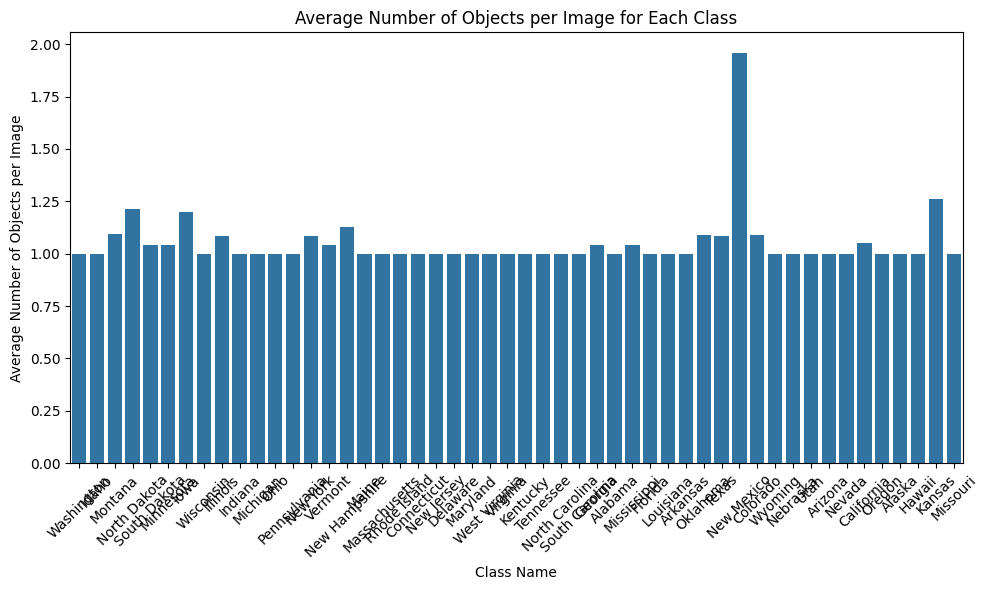

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_file_path = "/content/drive/MyDrive/map_detect/test_result_03/output_objects.csv"

df = pd.read_csv(csv_file_path)

class_names = train_metadata.thing_classes

avg_objects_per_class = df.groupby(["File Name", "Class Name"])["Object Number"].count().reset_index()
avg_objects_per_class = avg_objects_per_class.groupby("Class Name")["Object Number"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Class Name", y="Object Number", data=avg_objects_per_class, ci=None, order=class_names)
plt.xticks(rotation=45)
plt.xlabel("Class Name")
plt.ylabel("Average Number of Objects per Image")
plt.title("Average Number of Objects per Image for Each Class")
plt.tight_layout()
plt.show()